<a href="https://colab.research.google.com/github/kmeiyalagan/kmeiyalagan/blob/main/Customer%20Service%20Requests%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Service Requests Analysis**

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('/content/311_Service_Requests_from_2010_to_Present.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [5]:
dt = data.dtypes
dt

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [6]:
data["Created Date"] = pd.to_datetime(data["Created Date"])
data["Closed Date"] = pd.to_datetime(data["Closed Date"])
dt = data.dtypes
dt

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [7]:
data["Request_Closing_Time"] = data["Closed Date"] - data["Created Date"]
data["count"] = 1
data.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,count
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,1
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,1


**Analysis view 1 - Top 10 Compliant type**

In [8]:
A1 = data.pivot_table(index="Complaint Type",values="count",aggfunc=sum )
A1 = A1.sort_values(by="count",axis=0,ascending=False)

Text(0, 0.5, 'No of Compliants')

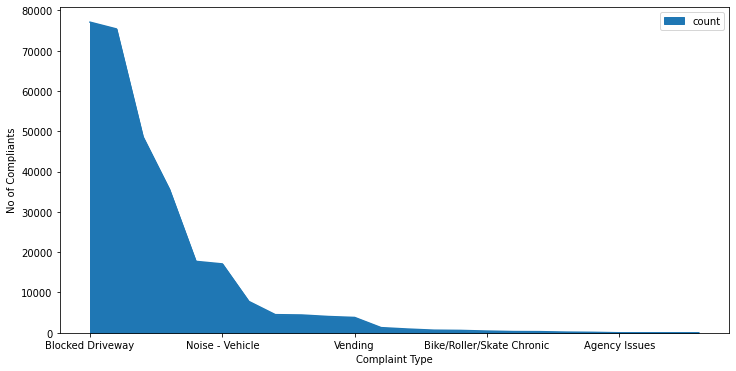

In [9]:

fig, axs = plt.subplots(figsize=(12, 6))
A1.plot.area(ax=axs)
axs.set_ylabel("No of Compliants")

Analysis view 2 - Unresolved

In [10]:
A2 = data[data['Closed Date'].isnull()]
A2

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,count
416,32305700,2015-12-31 14:16:04,NaT,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,5426-5526 90TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1
611,32309308,2015-12-31 09:58:06,NaT,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NaN,30 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1
1648,32303348,2015-12-30 05:13:42,NaT,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,NaN,21600-2169 91ST AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1
1816,32294519,2015-12-29 22:44:50,NaT,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,127 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1
1965,32296487,2015-12-29 19:09:13,NaT,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,5201-5299 68TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300273,30287350,2015-03-29 14:40:19,NaT,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,3801-3999 23RD AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1
300492,30284963,2015-03-29 08:50:15,NaT,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,COOPER AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1
300496,30285492,2015-03-29 08:44:13,NaT,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1
300620,30282717,2015-03-29 01:55:35,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1


Analysis view 3 - Unresolved count by Compliant type

Text(0, 0.5, 'No of Compliants')

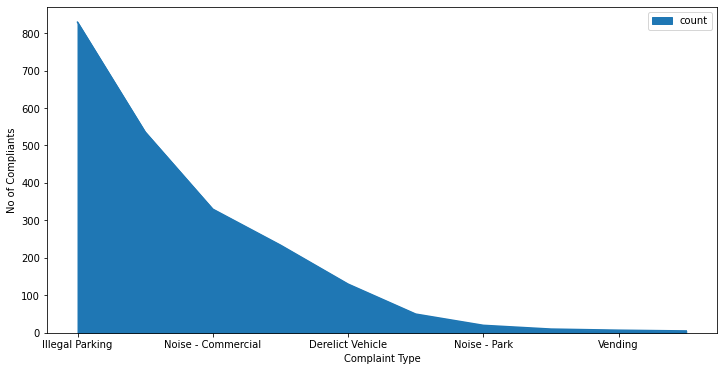

In [11]:
A3 = A2.pivot_table(index="Complaint Type",values="count",aggfunc=sum )
A3 = A3.sort_values(by="count",axis=0,ascending=False).head(10)
fig, axs = plt.subplots(figsize=(12, 6))
A3.plot.area(ax=axs)
axs.set_ylabel("No of Compliants")


Analysis view 4 - Unresolved %

In [12]:
data["status"] = np.where(data['Closed Date'].isnull(), 'Open', 'Closed')
A4 = data.pivot_table(index="Complaint Type",columns="status",values="count",aggfunc=sum,fill_value=0)
A4["Percentage"] = A4["Open"] / (A4["Closed"] + A4["Open"]) *100
A4 = A4.sort_values(by="Percentage",axis=0,ascending=False)
A4

status,Closed,Open,Percentage
Complaint Type,,,
Ferry Complaint,0,2,100.000000
Noise - Street/Sidewalk,48076,536,1.102608
Illegal Parking,74532,829,1.100038
Noise - Commercial,35247,330,0.927566
Derelict Vehicle,17588,130,0.733717
Bike/Roller/Skate Chronic,424,3,0.702576
Panhandling,305,2,0.651466
Noise - Park,4022,20,0.494805
Drinking,1275,5,0.390625


Text(0, 0.5, 'No of Compliants')

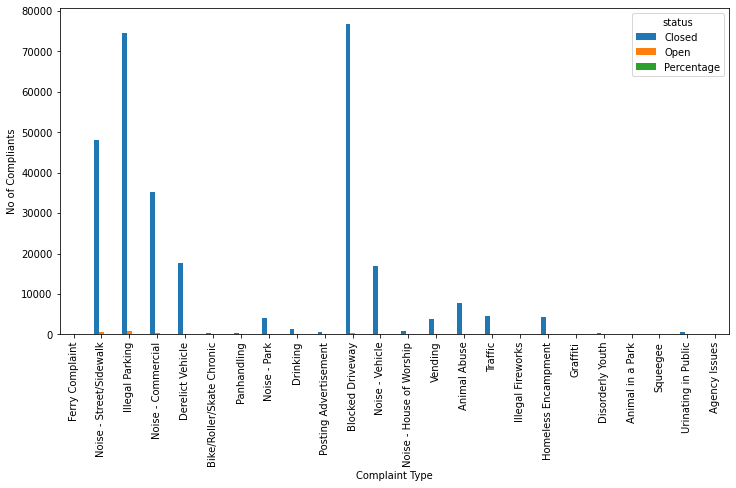

In [13]:
fig, axs = plt.subplots(figsize=(12, 6))
A4.plot.bar(ax=axs)
axs.set_ylabel("No of Compliants")

Analysis view 5 - Number of incidents by location

In [14]:
A5 = data.pivot_table(index="Location Type",values="count",aggfunc=sum,fill_value=0)
A5 = A5.sort_values(by="count",axis=0,ascending=False)
A5

,count
Location Type,
Street/Sidewalk,249299
Store/Commercial,20381
Club/Bar/Restaurant,17360
Residential Building/House,6960
Park/Playground,4773
House of Worship,929
Residential Building,227
Highway,215
Parking Lot,117


Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations

In [46]:
A6 = data.pivot_table(index="Location Type",values="Request_Closing_Time",aggfunc='mean')
A6 = A6.sort_values(by="Request_Closing_Time",axis=0,ascending=False)
A6

,Request_Closing_Time
Location Type,
Park,14 days 00:50:05
Vacant Lot,0 days 07:28:26.129870129
Commercial,0 days 05:20:33.967741935
Parking Lot,0 days 05:20:07.820512820
Residential Building/House,0 days 05:09:30.340716237
House and Store,0 days 05:00:47.741935483
Residential Building,0 days 04:49:05.396475770
Street/Sidewalk,0 days 04:28:30.918352504
Roadway Tunnel,0 days 04:26:31.542857142




```
# This is formatted as code
```

# statistical test

Whether the average response time across complaint types is similar or not (overall)

In [47]:
s1 = data.pivot_table(index="Complaint Type",values="Request_Closing_Time",aggfunc='mean')
s1 = s1.sort_values(by="Request_Closing_Time",axis=0,ascending=False)
s1

,Request_Closing_Time
Complaint Type,
Animal in a Park,14 days 00:50:05
Derelict Vehicle,0 days 07:21:50.902717762
Graffiti,0 days 07:09:04.504424778
Agency Issues,0 days 05:15:37.166666666
Animal Abuse,0 days 05:12:47.677780638
Blocked Driveway,0 days 04:44:27.258638198
Illegal Parking,0 days 04:30:04.145454301
Panhandling,0 days 04:22:21.963934426
Homeless Encampment,0 days 04:21:56.052536231


Are the type of complaint or service requested and location related

In [53]:
s1 = data.pivot_table(index=["Location Type","Complaint Type"],values="count",aggfunc='count')
s1 = s1.sort_values(by="count",axis=0,ascending=False)
s1

count
Location Type    Complaint Type                
Street/Sidewalk  Blocked Driveway         77007
                 Illegal Parking          75326
                 Noise - Street/Sidewalk  48601
Store/Commercial Noise - Commercial       18598
Street/Sidewalk  Derelict Vehicle         17614
...                                         ...
Store/Commercial Illegal Fireworks            2
Park             Animal in a Park             1
Ferry            Ferry Complaint              1
Terminal         Ferry Complaint              1
Roadway Tunnel   Homeless Encampment          1

[71 rows x 1 columns]